In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

# Chapter 2

---

### Block Matrices

Let us consider block matrices
\begin{align*}X = \begin{bmatrix} A & B \\ C & D \end{bmatrix} &= \left[
  \begin{array}{ccc|cc}
  1.0 & 2.0 & 3.0 & 7.0 & 8.0 \\
  4.0 & 5.0 & 6.0 & 9.0 & 10.0 \\
  \hline
  11.0 & 12.0 & 13.0 & 14.0 & 15.0
\end{array} \right] , \\[5pt]
Y = \begin{bmatrix} E & F \\ G & H \end{bmatrix} &= \left[
  \begin{array}{cc|cc}
  0.1 & 0.2 & 0.7 & 0.8 \\
  0.3 & 0.4 & 0.9 & 1.0 \\
  0.5 & 0.6 & 1.1 & 1.2 \\
  \hline
  1.3 & 1.4 & 1.7 & 1.8 \\
  1.5 & 1.6 & 1.9 & 2.0
\end{array} \right] . \end{align*}

In NumPy, block matrices can be created by the function `np.block`.

In [3]:
A = np.array([[1.0, 2.0, 3.0],
              [4.0, 5.0, 6.0]])
B = np.array([[7.0, 8.0],
              [9.0, 10.0]])
C = np.array([[11.0, 12.0, 13.0]])
D = np.array([[14.0, 15.0]])

X = np.block([[A, B],
              [C, D]])

print("X = ")
print(X)

X = 
[[ 1.  2.  3.  7.  8.]
 [ 4.  5.  6.  9. 10.]
 [11. 12. 13. 14. 15.]]


By slicing the matrices, we can conversely construct blocks from a given matrix by usual index operations.

In [4]:
Y = np.array([[0.1, 0.2, 0.7, 0.8],
              [0.3, 0.4, 0.9, 1.0],
              [0.5, 0.6, 1.1, 1.2],
              [1.3, 1.4, 1.7, 1.8],
              [1.5, 1.6, 1.9, 2.0]])

# various ways of indexing

E = Y[:3, 0:2] # :3 is the equivalent of 0:3
F = Y[0:3, 2:] # 2: is the equivalent of 2:4, because there are 4 columns
G = Y[3:5, :2]
H = Y[3:, 2:4] # 3: is the equivalent of 3:5, because there are 5 rows

print("Blocks:")
print("E =")
print(E)
print("\nF =")
print(F)
print("\nG =")
print(G)
print("\nH =")
print(H)

Blocks:
E =
[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]

F =
[[0.7 0.8]
 [0.9 1. ]
 [1.1 1.2]]

G =
[[1.3 1.4]
 [1.5 1.6]]

H =
[[1.7 1.8]
 [1.9 2. ]]


Multiplying block matrices can simply be done by performing "blockwise multiplication", *i.e.*, multiplication  done symbolically as if each block are scalars (as long as the sizes of the blocks are well set so that the multiplications make sense).

For the example above, while $X \in \mathbb{R}^{3\times 5}$ and $Y \in \mathbb{R}^{5\times 4}$, we can exploit the block structure in multiplying them as if we are multiplying two $2 \times 2$ matrices:
$$ XY=  \begin{bmatrix} A & B \\ C & D \end{bmatrix} \begin{bmatrix} E & F \\ G & H \end{bmatrix} = \begin{bmatrix} AE + BG & AF + BH \\ CE + DG & CF + DH \end{bmatrix}. $$

In [5]:
print("Direct multplication: X*Y =")
print(X @ Y)
print("\n\nBlocks:")
print("A*E + B*G =")
print(A@E + B@G)
print("\nA*F + B*H =")
print(A@F + B@H)
print("\nC*E + D*G =")
print(C@E + D@G)
print("\nC*F + D*H =")
print(C@F + D@H)

Direct multplication: X*Y =
[[23.3 25.4 32.9 35. ]
 [31.6 35.  48.2 51.6]
 [51.9 58.4 85.1 91.6]]


Blocks:
A*E + B*G =
[[23.3 25.4]
 [31.6 35. ]]

A*F + B*H =
[[32.9 35. ]
 [48.2 51.6]]

C*E + D*G =
[[51.9 58.4]]

C*F + D*H =
[[85.1 91.6]]


Because matrix multiplication is not commutative, the order of the factors must **not** be altered.

For example, the first block of $XY$ is $AE + BG$, and you must not confuse it with $EA + GB$. (In fact, the latter is not even well-defined.)

In [6]:
try:
    print(E@A + G@B)
except Exception as e:
    print("The following error has occured:")
    print(e)

The following error has occured:
operands could not be broadcast together with shapes (3,3) (2,2) 


### Inverse of a Block Matrix

Now let us consider the following block matrix
$$ Z = \begin{bmatrix} Z_{11} & Z_{12} \\ Z_{21} & Z_{22} \end{bmatrix} = \left[
  \begin{array}{ccc|cc}
  1 & 2 & 2 & 1 & 3 \\
  1 & 4 & 5 & 0 & 2 \\
  2 & 7 & 8 & 3 & 7 \\
  \hline
  5 & 3 & 0 & 4 & 3 \\
  2 & 3 & 1 & 9 & 7
\end{array} \right].$$

In [6]:
Z11 = np.array([[1, 2, 2],
                [1, 4, 5],
                [2, 7, 8]])
Z12 = np.array([[1, 3],
                [0, 2],
                [3, 7]])
Z21 = np.array([[5, 3, 0],
                [2, 3, 1]])
Z22 = np.array([[4, 3],
                [9, 7]])

Z = np.block([[Z11, Z12],
              [Z21, Z22]])

print("Z = ")
print(Z)

Z = 
[[1 2 2 1 3]
 [1 4 5 0 2]
 [2 7 8 3 7]
 [5 3 0 4 3]
 [2 3 1 9 7]]


$Z_{11}$ is invertible, so we can do Gaussian elimination to eliminate $Z_{21}$:
$$ \begin{bmatrix} Z_{11}^{-1} & \boldsymbol{0} \\ -Z_{21} Z_{11}^{-1} & I_{22} \end{bmatrix} \begin{bmatrix} Z_{11} & Z_{12} \\ Z_{21} & Z_{22} \end{bmatrix} = \begin{bmatrix} I_{11} &  Z_{11}^{-1} Z_{12} \\ \boldsymbol{0} & Z_{22} - Z_{21} Z_{11}^{-1} Z_{12} \end{bmatrix} .$$

&nbsp;

The matrix $S_{22} := Z_{22} - Z_{21} Z_{11}^{-1} Z_{12}$ is called the **Schur complement** of $Z_{11}$ in $Z$.

In [7]:
Z11_inv = np.linalg.inv(Z11)
print(Z11_inv)

[[ 3.  2. -2.]
 [-2. -4.  3.]
 [ 1.  3. -2.]]


In [8]:
L1 = np.block([[Z11_inv, np.zeros((3, 2))],
              [-Z21 @ Z11_inv, np.eye(2)]])
print(L1 @ Z)

[[  1.   0.   0.  -3.  -1.]
 [  0.   1.  -0.   7.   7.]
 [  0.   0.   1.  -5.  -5.]
 [ -0.  -0.  -0.  -2. -13.]
 [ -0.  -0.  -0.  -1.  -7.]]


In [9]:
print("Z_11^-1 * Z_12 =")
print(Z11_inv @ Z12)

S22 = Z22 - Z21 @ Z11_inv @ Z12
print("\nS_22 =")
print(S22)

Z_11^-1 * Z_12 =
[[-3. -1.]
 [ 7.  7.]
 [-5. -5.]]

S_22 =
[[ -2. -13.]
 [ -1.  -7.]]


In this example, the Schur complement $S_{22}$ is also invertible. Thus we may do Gaussian elimination once more to get
$$ \begin{bmatrix} I_{11} & -Z_{11}^{-1} Z_{12} S_{22}^{-1} \\ \boldsymbol{0} & S_{22}^{-1} \end{bmatrix} \begin{bmatrix} I_{11} &  Z_{11}^{-1} Z_{12} \\ \boldsymbol{0} & S_{22} \end{bmatrix} = \begin{bmatrix} I_{11} & \boldsymbol{0}  \\ \boldsymbol{0} & I_{22} \end{bmatrix}.$$





In [10]:
S_inv = np.linalg.inv(S22)
print(S_inv)

[[-7. 13.]
 [ 1. -2.]]


In [11]:
L2 = np.block([[np.eye(3), -Z11_inv @ Z12 @ S_inv],
               [np.zeros((2, 3)), S_inv]])
print(L2 @ (L1 @ Z))

[[ 1.  0.  0. -0.  0.]
 [ 0.  1. -0. -0. -0.]
 [-0.  0.  1.  0.  0.]
 [-0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0.  1.]]


From the eliminations, we get the formula for the inverse of a block matrix
\begin{align*}
\begin{bmatrix} Z_{11} & Z_{12} \\ Z_{21} & Z_{22} \end{bmatrix} ^{-1} &= \begin{bmatrix} I_{11} & -Z_{11}^{-1} Z_{12} S_{22}^{-1} \\ \boldsymbol{0} & S_{22}^{-1} \end{bmatrix}  \begin{bmatrix} Z_{11}^{-1} & \boldsymbol{0} \\ -Z_{21} Z_{11}^{-1} & I_{22} \end{bmatrix} \\[5pt]
&= \begin{bmatrix} Z_{11}^{-1} + Z_{11}^{-1} Z_{12} S_{22}^{-1} Z_{21} Z_{11}^{-1}  &  -Z_{11}^{-1} Z_{12} S_{22}^{-1}  \\  -S_{22}^{-1} Z_{21} Z_{11}^{-1} & S_{22}^{-1} \end{bmatrix} .
\end{align*}

In [12]:
print("Direct inverse: Z^-1 =")
print(np.linalg.inv(Z))

print("\n\nBlocks:")
print("Z_11^-1 + Z_11^-1 * Z_12 * S_22^-1 * Z_21 * Z_11^-1 =")
print(Z11_inv + Z11_inv @ Z12 @ S_inv @ Z21 @ Z11_inv)
print("\n-Z_11^-1 * Z_12 * S_22^-1 =")
print(-Z11_inv @ Z12 @ S_inv)
print("\n-S_22^-1 * Z_21 * Z_11^-1 =")
print(-S_inv @ Z21 @ Z11_inv)
print("\nS_22^-1 =")
print(S_inv)

Direct inverse: Z^-1 =
[[ 146.  147. -133.  -20.   37.]
 [-303. -305.  276.   42.  -77.]
 [ 216.  218. -197.  -30.   55.]
 [  50.   51.  -46.   -7.   13.]
 [  -7.   -8.    7.    1.   -2.]]


Blocks:
Z_11^-1 + Z_11^-1 * Z_12 * S_22^-1 * Z_21 * Z_11^-1 =
[[ 146.  147. -133.]
 [-303. -305.  276.]
 [ 216.  218. -197.]]

-Z_11^-1 * Z_12 * S_22^-1 =
[[-20.  37.]
 [ 42. -77.]
 [-30.  55.]]

-S_22^-1 * Z_21 * Z_11^-1 =
[[ 50.  51. -46.]
 [ -7.  -8.   7.]]

S_22^-1 =
[[-7. 13.]
 [ 1. -2.]]


### Graphs and Matrices

Consider the graph example in section 2.8 of our textbook.

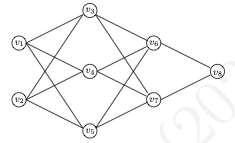

In [25]:
from IPython.display import Image
Image('/Users/wanmokang/Downloads/sec2_8-undirected_graph.png', width = 500)

There are several ways to represent a graph. One is to use a *list of lists*, where the $i$th list is the list of all vertices adjacent to the $i$th vertex.

This is often called the *adjacency list*  of a graph.

In [10]:
# adjacency list
edges = [[],            # 0
         [3, 4, 5],     # 1
         [3, 4, 5],     # 2
         [1, 2, 6, 7],  # 3
         [1, 2, 6, 7],  # 4
         [1, 2, 6, 7],  # 5
         [3, 4, 5, 8],  # 6
         [3, 4, 5, 8],  # 7
         [6, 7]]        # 8

Another way of representing a graph is to use the adjacency matrix, whose $(i, j)$ entry is equal to the number of edges between $v_i$ and $v_j$.

In [11]:
# adjacency matrix
A = np.zeros((8, 8))
for i in range(1, 8+1):
    for j in edges[i] :
        A[i-1, j-1] = 1

print(A)

[[0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0.]]


An example where adjacency matrices are particularly useful is the following.
We call that a path in a graph is of *length* $m$ if that path is consisted of $m$ edges (not necessarily distinct).


> Given two vertices $v_i$ and $v_j$, how many distinct paths of length $m$ are there from $v_i$ to $v_j$?

For example, when $i=6$, $j=8$, and $m=3$ in our graph, there are $8$ paths from $v_6$ to $v_8$ that are of length $3$:


1.   $v_6 \to v_3 \to v_6 \to v_8$,
2.   $v_6 \to v_4 \to v_6 \to v_8$,
3.   $v_6 \to v_5 \to v_6 \to v_8$,
4.   $v_6 \to v_3 \to v_7 \to v_8$,
5.   $v_6 \to v_4 \to v_7 \to v_8$,
6.   $v_6 \to v_5 \to v_7 \to v_8$,
7.   $v_6 \to v_8 \to v_6 \to v_8$,
8.   $v_6 \to v_8 \to v_7 \to v_8$.

The fact that there are $8$ such paths can be verified by brute force. Clearly, however, the problem gets quickly intractable as $m$ gets large.


Interestingly, adjacency matrices have the following property.

> Let $A$ be an adjacency matrix of a given graph. Then, $[A^m]_{i j}$ is the number of length $m$ paths from $v_i$ to $v_j$.

The statement above holds even if we allow having multiple edges between two vertices.

Proof can be done by induction on $m$.

&nbsp;

So, for example, looking at $A^{3}$ we can see how many paths of length $3$ are there between any pair of vertices.



In [12]:
print(np.linalg.matrix_power(A, 3))

[[ 0.  0. 12. 12. 12.  0.  0.  6.]
 [ 0.  0. 12. 12. 12.  0.  0.  6.]
 [12. 12.  0.  0.  0. 14. 14.  0.]
 [12. 12.  0.  0.  0. 14. 14.  0.]
 [12. 12.  0.  0.  0. 14. 14.  0.]
 [ 0.  0. 14. 14. 14.  0.  0.  8.]
 [ 0.  0. 14. 14. 14.  0.  0.  8.]
 [ 6.  6.  0.  0.  0.  8.  8.  0.]]


Rearranging the order of vertices, we see that it is possible to group the vertices into two sets $V_1 = \{v_3, v_4, v_5, v_8\}$ and $V_2 = \{v_1, v_2, v_6, v_7\}$ so that there are no edges between two vertices in the same set.

Because of this property of the graph being *bipartite*, the adjacency matrix $B$ we get after permuting the vertices has a block structure.

In [17]:
# permuted adjacency matrix
B = np.zeros((8, 8))
v_order = [3, 4, 5, 8, 1, 2, 6, 7]

for m in range(8):
    for n in range(8) :
        i = v_order[m]
        j = v_order[n]
        if j in edges[i] :
            B[m, n] = 1

print(B)

[[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]]


Considering paths of length $2$, it should be clear that $B^2$ is a block diagonal matrix.

In [18]:
B2 = B @ B # shall not be confused with B**2
print(B2)

[[4. 4. 4. 2. 0. 0. 0. 0.]
 [4. 4. 4. 2. 0. 0. 0. 0.]
 [4. 4. 4. 2. 0. 0. 0. 0.]
 [2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 3. 3. 3.]
 [0. 0. 0. 0. 3. 3. 3. 3.]
 [0. 0. 0. 0. 3. 3. 4. 4.]
 [0. 0. 0. 0. 3. 3. 4. 4.]]


&nbsp;